In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
import os

print("Current working directory:", os.getcwd())
# Make sure 'products.csv' exists in this directory or provide the correct path
df = pd.read_csv('data/products.csv')

Current working directory: /home/civm/Documents/ai6/thedivashop


In [32]:
df.describe()

,price,compare_at_price,vendor,product_type,tags,variant_count
count,79.000000,39.000000,0.0,0.0,0.0,79.000000
mean,5437.291139,4664.897436,NaN,NaN,NaN,5.316456
std,12427.257183,3058.178369,NaN,NaN,NaN,9.318501
min,800.000000,1300.000000,NaN,NaN,NaN,1.000000
25%,1400.000000,1949.000000,NaN,NaN,NaN,1.000000
50%,2299.000000,4200.000000,NaN,NaN,NaN,2.000000
75%,5650.000000,6750.000000,NaN,NaN,NaN,6.000000
max,100000.000000,14600.000000,NaN,NaN,NaN,61.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   collection             79 non-null     object 
 1   title                  79 non-null     object 
 2   url                    79 non-null     object 
 3   price                  79 non-null     float64
 4   compare_at_price       39 non-null     float64
 5   currency               44 non-null     object 
 6   vendor                 0 non-null      float64
 7   product_type           0 non-null      float64
 8   tags                   0 non-null      float64
 9   images                 57 non-null     object 
 10  variant_count          79 non-null     int64  
 11  variant_titles         79 non-null     object 
 12  variant_option_names   79 non-null     object 
 13  variant_option_values  79 non-null     object 
dtypes: float64(5), int64(1), object(8)
memory usage: 8.8+ KB


In [13]:
df.nunique()

collection                9
title                    79
url                      79
price                    47
compare_at_price         25
currency                  1
vendor                    0
product_type              0
tags                      0
images                   57
variant_count            17
variant_titles           46
variant_option_names      7
variant_option_values    45
dtype: int64

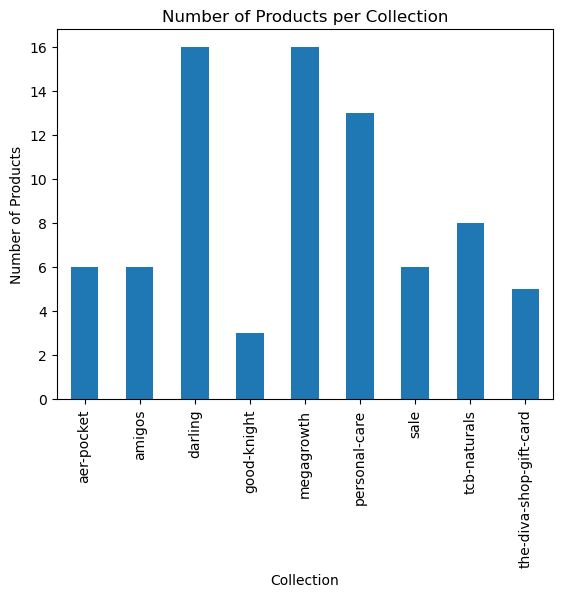

In [15]:
df.groupby('collection').size().plot(kind='bar')
plt.title('Number of Products per Collection')
plt.xlabel('Collection')
plt.ylabel('Number of Products')
plt.show()

In [33]:
df.duplicated().sum()

np.int64(0)

In [34]:
df = df.drop(columns=[
    'vendor', 'product_type', 'tags', 'currency'])

In [35]:
df[df['collection'] == 'darling'].isnull().sum()

collection               0
title                    0
url                      0
price                    0
compare_at_price         2
images                   3
variant_count            0
variant_titles           0
variant_option_names     0
variant_option_values    0
dtype: int64

In [41]:
df.isna().sum()

collection                0
title                     0
url                       0
price                     0
compare_at_price          0
images                   22
variant_count             0
variant_titles            0
variant_option_names      0
variant_option_values     0
dtype: int64

In [38]:
df['compare_at_price'] = df['compare_at_price'].fillna(df['price'])

In [40]:
df

,collection,title,url,price,compare_at_price,images,variant_count,variant_titles,variant_option_names,variant_option_values
0,darling,Darling Bohemian Passion Twist,https://thedivashop.ng/products/bohemian-passi...,7400.0,7800.0,https://thedivashop.ng/cdn/shop/products/Darli...,6,1; 1/27; 1/900; 1/GOLD; 1/35; 1/PURPLE,Color,Color: 1|1/27|1/35|1/900|1/GOLD|1/PURPLE
1,darling,Darling Afro Puff Pony,https://thedivashop.ng/products/darling-afro-p...,4800.0,4800.0,https://thedivashop.ng/cdn/shop/products/Afro-...,2,1; GOLD,Color,Color: 1|GOLD
2,darling,Darling Duchess Regular Cut,https://thedivashop.ng/products/darling-duches...,4100.0,4800.0,NaN,8,1; 27; 30; BG900; CAMO GREEN; DARLING PURPLE; ...,Color,Color: 1|27|30|33|BG900|CAMO GREEN|DARLING PUR...
3,darling,Darling Duchess Pre-Cut,https://thedivashop.ng/products/darling-duches...,7700.0,9100.0,NaN,11,1; 27; 30; BG900; CAMO GREEN; DARLING PURPLE; ...,Color,Color: 1|27|30|33|BG900|CAMO GREEN|Cute Pink|D...
4,darling,Darling Easy Braid 2X,https://thedivashop.ng/products/darling-easy-b...,2600.0,2700.0,https://thedivashop.ng/cdn/shop/products/EASYB...,4,1; 1/IVORY; 1/DARLING PURPLE; 1/BABY PINK,Color,Color: 1|1/BABY PINK|1/DARLING PURPLE|1/IVORY
...,...,...,...,...,...,...,...,...,...,...
74,the-diva-shop-gift-card,The Diva Shop Gift Card - Bronze,https://thedivashop.ng/products/the-diva-shop-...,5000.0,5000.0,NaN,1,5000,Denominations,Denominations: 5000
75,the-diva-shop-gift-card,The Diva Shop Gift Card - Diamond,https://thedivashop.ng/products/the-diva-shop-...,100000.0,100000.0,NaN,1,100000.00,Denominations,Denominations: 100000.00
76,the-diva-shop-gift-card,The Diva Shop Gift Card - Gold,https://thedivashop.ng/products/the-diva-shop-...,20000.0,20000.0,NaN,1,20000,Denominations,Denominations: 20000
77,the-diva-shop-gift-card,The Diva Shop Gift Card - Platinum,https://thedivashop.ng/products/the-diva-shop-...,50000.0,50000.0,NaN,1,50000.00,Denominations,Denominations: 50000.00
